In [ ]:
# This finds the focal length of a lens to optimize the coupling between lens 'output'
# and waveguide in the chip

# Created 2023 Mar 16 by E.S.

In [34]:
import pandas as pd
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.modeling import functional_models, fitting

In [16]:
# read in intensity profile (source: Simon)

# Simon:
#The waveguide modes have a 4sigma diameter of 8.3x7.6um. A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
#Both at a wavelength of 1550nm.
#The attached CSV file contains the corresponding intensity profile. The scale is 0.2161um per pixel.

df_intensity = np.genfromtxt("./data/AF45_100x_Zeiss_300um_1550nm_1000mmmin_67.5nJ.csv", delimiter=";")

In [30]:
np.shape(df_intensity)

(256, 320)

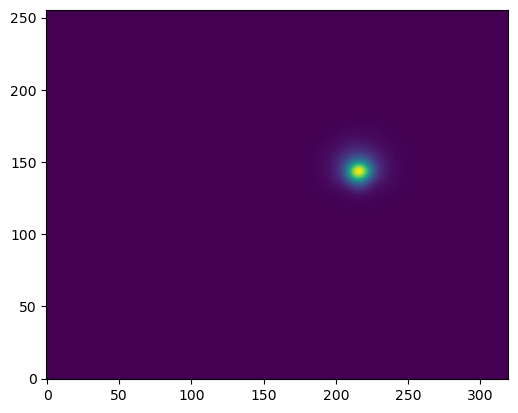

In [17]:
plt.imshow(df_intensity, origin="lower")
plt.show()

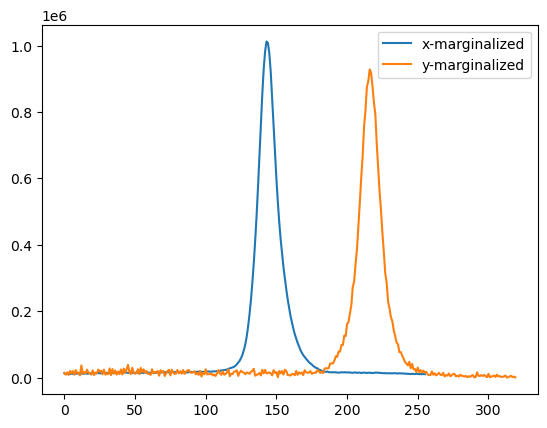

In [22]:
plt.plot(np.sum(df_intensity,axis=1), label="x-marginalized")
plt.plot(np.sum(df_intensity,axis=0), label="y-marginalized")
plt.legend()
plt.show()

In [27]:
def airy_fit(radius=radius_pass):
    
    return functional_models.AiryDisk2D(amplitude=1, x_0=0, y_0=0, radius=radius)

In [29]:
type(test)

<class 'astropy.modeling.functional_models.AiryDisk2D'>
Name: AiryDisk2D
N_inputs: 2
N_outputs: 1
Fittable parameters: ('amplitude', 'x_0', 'y_0', 'radius')

In [51]:
p_init = functional_models.AiryDisk2D(amplitude=1, x_0=220, y_0=145, radius=1)

In [52]:
y, x = np.mgrid[:256, :320]

In [53]:
fit_p = fitting.LevMarLSQFitter()

In [54]:
print(np.shape(x))
print(np.shape(y))
print(np.shape(df_intensity))

(256, 320)
(256, 320)
(256, 320)


In [60]:
p = fit_p(p_init, x, y, z=np.divide(df_intensity,np.max(df_intensity))) # normalize the intensity

In [62]:
radius_converged_um = p.radius.value*0.2161 # 0.2161um per pixel

In [63]:
radius_converged_um

4.380462416934426